# Data Analysis

In this section we will have a look at the difference in products between hedonic and utilitarian dirven products. We will see if we can find any patterns in the data from a descriptive level and then move on to a more inferential level.

In [2]:
# Installing packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from nltk import bigrams
from wordcloud import WordCloud


In [41]:
# importing data
data_utilitarian_filter = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/DataBase/Without Meta/WithMeta/Meta_utilitarian_filter.csv')

data_utilitarian_razor = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/DataBase/Without Meta/WithMeta/Meta_utilitarian_razor.csv')

data_hedonic_parfum = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/DataBase/Without Meta/WithMeta/Meta_hedonic_parfum.csv')

In [53]:
data_frames = [data_utilitarian_razor, data_utilitarian_filter, data_hedonic_parfum]

# Iterate over each DataFrame
for df in data_frames:
    # Check if 'timestamp' column exists in the DataFrame
    if 'timestamp' in df.columns:
        # Convert 'timestamp' column to datetime format
        df['timestamp'] = pd.to_datetime(df['timestamp'])

# Functions for data analysis

In [68]:
def plot_reviews_by_year(df, title_suffix=None):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    df['year'].hist(bins=len(df['year'].unique()), color='blue', alpha=0.5)
    if title_suffix:
        plt.title(f'Distribution of Reviews by Year - {title_suffix}')
    else:
        plt.title('Distribution of Reviews by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Reviews')
    plt.grid(True)
    plt.show()

In [69]:

def plot_avg_rating_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Group by year and calculate the average rating
    avg_rating_by_year = df.groupby('year')['rating'].mean()

    # Plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(avg_rating_by_year.index, avg_rating_by_year.values, color='blue', marker='o', linestyle='-')
    plt.title('Average Rating of Reviews by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.grid(True)
    plt.show()

# Example usage:
# plot_avg_rating_by_year(your_dataframe)


In [72]:
# Function for showing the amount on reviews by year

def plot_rating_counts_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Map ratings to categories (1 and 2 as negative, 3 as neutral, 4 and 5 as positive)
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}
    df['rating_category'] = df['rating'].map(rating_categories)

    # Group by year and rating category, then count the occurrences
    rating_counts_by_year = df.groupby(['year', 'rating_category']).size().unstack(fill_value=0)

    # Plot the stacked bar plot
    plt.figure(figsize=(10, 6))
    rating_counts_by_year.plot(kind='bar', stacked=True, color=['red', 'grey', 'green'], alpha=0.7)
    plt.title('Rating Distribution by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Ratings')
    plt.legend(title='Rating Category', loc='upper left')
    plt.grid(True)
    plt.show()


In [76]:
# Showing sentiment distribution by year

def plot_sentiment_by_year(df):
    # Extract the year from the timestamp
    df['year'] = df['timestamp'].dt.year

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='sentiment', data=df, palette='Set2')
    plt.title('Distribution of Text Sentiment by Year')
    plt.xlabel('Year')
    plt.ylabel('Text Sentiment')
    plt.grid(True)
    plt.show()


In [78]:
def plot_average_rating_and_sentiment_over_time(data_frame):
    # Group the data by timestamp and calculate the average rating for each time period
    average_rating_over_time = data_frame.groupby(pd.Grouper(key='timestamp', freq='M'))['rating'].mean()

    # Group the data by timestamp and calculate the average sentiment score for each time period
    average_sentiment_over_time = data_frame.groupby(pd.Grouper(key='timestamp', freq='M'))['sentiment'].mean()

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting average rating over time
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Average Rating', color=color)
    ax1.plot(average_rating_over_time.index, average_rating_over_time.values, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    # Create a secondary y-axis for sentiment score
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Average Sentiment Score', color=color)
    ax2.plot(average_sentiment_over_time.index, average_sentiment_over_time.values, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Average Rating and Sentiment Over Time')
    plt.show()

## 1. Basic statistic

In [54]:
# Quick overlook of the data
print (data_hedonic_parfum.describe())
print (data_utilitarian_filter.describe())
print (data_utilitarian_razor.describe())

           rating                      timestamp  helpful_vote   sentiment  \
count  270.000000                            270    270.000000  270.000000   
mean     3.270370     2021-08-28 01:50:07.120000     15.781481    3.255556   
min      1.000000            2014-09-27 21:53:20      0.000000    0.000000   
25%      2.000000  2021-02-08 21:57:48.426999808      0.000000    4.000000   
50%      3.000000     2021-10-24 02:35:41.100000      0.000000    4.000000   
75%      5.000000  2022-07-28 09:47:19.612750080      1.000000    4.000000   
max      5.000000     2023-08-28 18:51:06.042000   3025.000000    4.000000   
std      1.582035                            NaN    188.158125    1.457409   

       average_rating  rating_number         price  
count    2.700000e+02          270.0  2.700000e+02  
mean     3.900000e+00        72669.0  1.695000e+01  
min      3.900000e+00        72669.0  1.695000e+01  
25%      3.900000e+00        72669.0  1.695000e+01  
50%      3.900000e+00        726

TypeError: list indices must be integers or slices, not str

Number of reviews with at least one helpful rating: 39


<Figure size 1000x600 with 0 Axes>

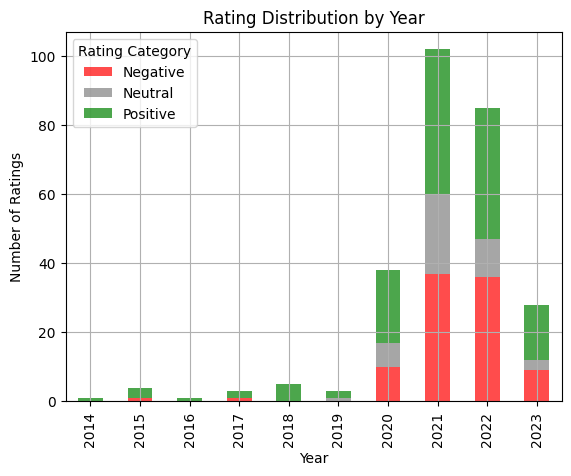

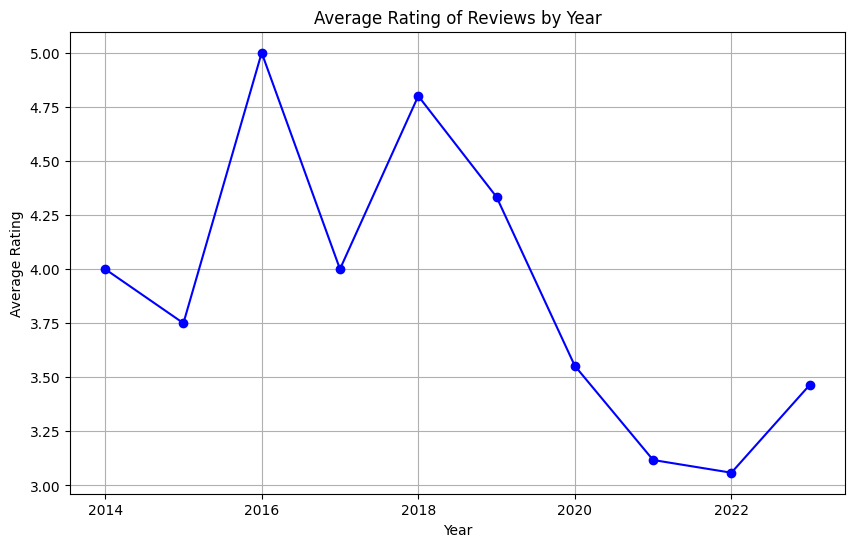

In [82]:
helpful_reviews_count = data_hedonic_parfum[data_hedonic_parfum['helpful_vote'] > 1].shape[0]
print("Number of reviews with at least one helpful rating:", helpful_reviews_count)

plot_rating_counts_by_year(data_hedonic_parfum)
plot_avg_rating_by_year(data_hedonic_parfum)

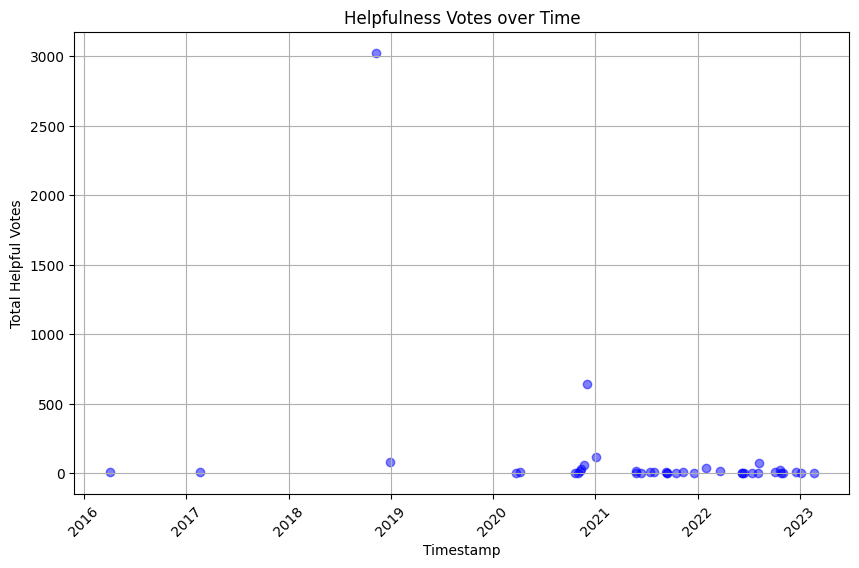

In [81]:
# Group by timestamp and calculate the sum of helpfulness votes
votes_by_timestamp = data_hedonic_parfum.groupby('timestamp')['helpful_vote'].sum()

votes_by_timestamp = votes_by_timestamp[votes_by_timestamp > 1]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(votes_by_timestamp.index, votes_by_timestamp, color='blue', alpha=0.5)
plt.title('Helpfulness Votes over Time')
plt.xlabel('Timestamp')
plt.ylabel('Total Helpful Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 3. Text Analysis Wordclouds 

In [ ]:
# Generating Wordclouds

def generate_wordcloud_reviews_by_sentiment(df):
    # Define rating categories
    rating_categories = {1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'}

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Iterate over each sentiment category
    for ax, sentiment in zip(axes.flatten(), ['Negative', 'Neutral', 'Positive']):
        # Filter out reviews based on sentiment
        reviews = df[df['rating'].map(rating_categories) == sentiment]
        
        # Drop rows where 'text_cleaned1' column contains NaN values
        reviews.dropna(subset=['text_cleaned1'], inplace=True)
        
        # Concatenate the cleaned text of reviews
        text = ' '.join(reviews['text_cleaned1'])

        # Generate bigrams from the text
        bigram_list = list(bigrams(text.split()))

        # Create a WordCloud object with bigrams
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(dict(bigram_list))

        # Plot the WordCloud
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Word Cloud of {sentiment} Reviews (Bigrams)')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()